# 章節 14：階層式模型

## 14.7 練習

#### 以下為譯者的想法，非原著作者

習題 14.1：

此習題是啟發自 《Jaynes 的 Probability Theory》

假設你買的捕蚊器可以減少你家附近蚊子的數量。每一星期，你清空捕蚊器並且計算蚊子捕捉的數量。

第一個星期後，有 30 隻。第二個星期後，有 20 隻。 請估計你家蚊子數量變化的百分比？

這邊有些建議：

- 假設每一週有很大量的蚊子 N ，在你家附近的濕地繁殖
- 一週內，一部分 f1 徘徊在你的院子裡，而其中又一部分 f2 被捕蚊燈抓到
- 你的解決方案應該考慮從一週到下一週有 N 有多少變化。你可以用階層式模型來模擬 N 的變化百分比。

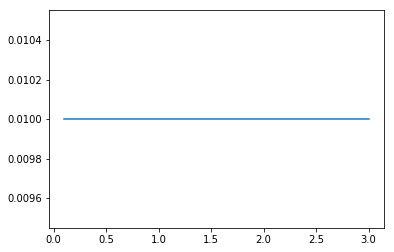

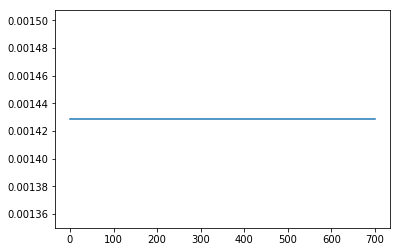

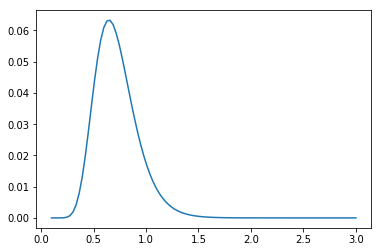

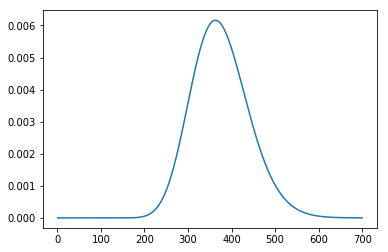

In [15]:
import thinkbayes as tb
import numpy as np
import matplotlib.pyplot as plt

def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

class ChangeRate(tb.Suite):
    
    def __init__(self, rates, caught_ratio):
        pmf = tb.Pmf()
        for r in rates:
            pmf.Set(Trap(r, caught_ratio), 1)
            
        pmf.Normalize()
        super().__init__(pmf)
        
    
    def Likelihood(self, data, hypo):
        #w1, w2 = data
        trap = hypo
        return trap.Update(data)
    
    
    
    def DistOfR(self):
        items = [(trap.rate, prob) for trap, prob in self.Items()]
        return tb.MakePmfFromItems(items)
    
    
    def DistOfN(self):
        return tb.MakeMixture(self)
    
    
        
class Trap(tb.Suite):
    
    def __init__(self, rate, caught_ratio):
        #prior = tb.MakePoissonPmf(rate, 301)
        prior = range(1, 701)
        super().__init__(prior)
        
        self.caught_ratio = caught_ratio
        self.rate = rate
        
    def Likelihood(self, data, hypo):
        w1k, w2k = data
        n = hypo
        p = self.caught_ratio
        # 假設為兩週的蚊子數量的服從二項次分佈且獨立
        like = tb.EvalBinomialPmf(w1k, n, p) * tb.EvalBinomialPmf(w2k, n*self.rate, p) 
        return like
    
    
data = 30, 20
f1, f2 = 0.8, 0.1
cr = ChangeRate(np.linspace(0.1, 3, 100), f1*f2)

plot_dist(cr.DistOfR())
plt.show()
plot_dist(cr.DistOfN())
plt.show()
cr.Update(data)

plot_dist(cr.DistOfR())
plt.show()
plot_dist(cr.DistOfN())
plt.show()

In [16]:
print(cr.DistOfR().MaximumLikelihood())
print(cr.DistOfN().MaximumLikelihood())

0.6565656565656565
363


在 f1, f2 的參數下，看到第一週 30 到第二週 20 隻蚊子的情況下：

- 最有可能的變化率是 65%
- 最有可能蚊子的數量 363